# What you'll learn

After watching this video, you will be able to:
* Explain how to use the Tekton CLI to search for tasks.
* Explain how to find a task to build and deploy an image.
* Describe how to add a deploy task to a pipeline after parallel tasks.

# CD Pipeline

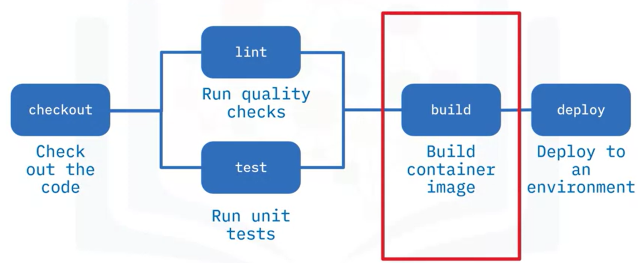

So far in **creating your CD pipeline**, you have addressed checking out the code by cloning it from GitHub, and running quality checks and unit tests like `flake8` and `nose`.

Now it's time to **build a container image** in preparation to deploy to Kubernetes.
* The purpose of the image build stage is to build a container image that you can push to a registry in preparation for deploying it into a Kubernetes environment.
* It's a good habit to get into searching the **Tekton catalog** at **Tekton Hub** for any new tasks you might need including this build task.
* In fact, you can also use the **Tekton CLI** "`hub`" command to search for pipelines and tasks.

Let's see how that works.

# Results from Tekton Hub Search

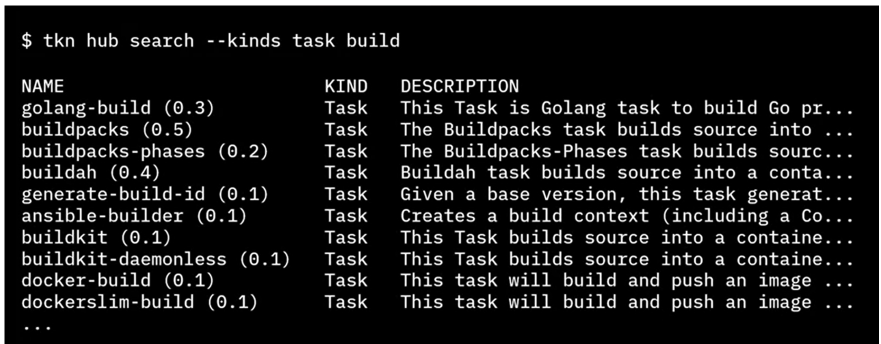

* You can use the command `tkn hub search` followed by the **"build"** search criteria.
* You can also add the `--kinds` flag to indicate that you’re only searching for tasks right now.
* All the tasks that match the **"build"** keyword are returned.

# Search Results

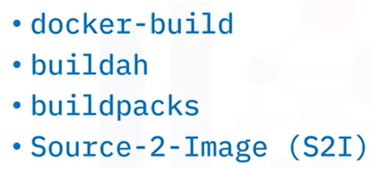

Let's take a closer look at some of the returned search results.
* The **docker-build** builds a Docker image from a **Dockerfile** and pushes a Docker image to a registry.
* This is what you want, so it might be a candidate.
* Another result is **buildah**.
* The **buildah** task builds your source into a container image from a **Dockerfile** and then pushes it to a container registry using Project Atomic's Buildah build tool.
* That looks like another likely candidate.
* **Buildpacks** was also returned.
* It accomplishes pretty much the same as the first two except that it uses **Cloud Native Buildpacks**.
* These are pluggable, modular tools that transform application source code into **Open Container Initiative** (or OCI) images without the need for **Dockerfiles**.
* There is also **Source-2-Image** (or s2i) which, like **buildpacks**, transforms your source code into OCI container images without the need for creating a Dockerfile.
* There are many build tasks to choose from, but you select buildah as the tool for your pipeline.

# Install the buildah task

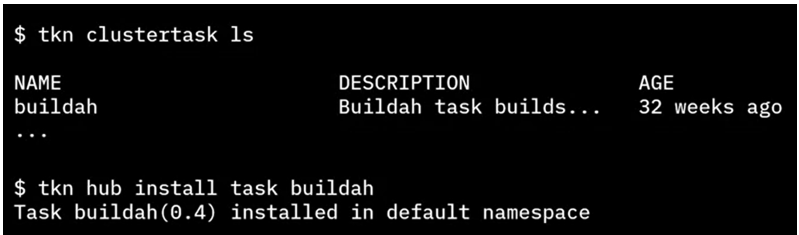

I'd like to point out that **administrators can install tasks at the cluster level**.
* It's always a good idea to use the command: `tkn clustertask ls` to see what cluster tasks are installed.
* In this example, **buildah** is installed at the cluster level so there is no need to install it locally into your namespace.
* Anyone in the cluster can use cluster tasks in their pipelines.
* If it isn’t installed at the cluster level, you can install the **buildah** task into your local namespace using the **Tekton CLI**.
* The command is `tkn hub install task` followed by the name of the task you want to install, which in this case is `buildah`.
* You should see a result returned that indicates that **buildah** has been installed into your current namespace.

# Read the documentation

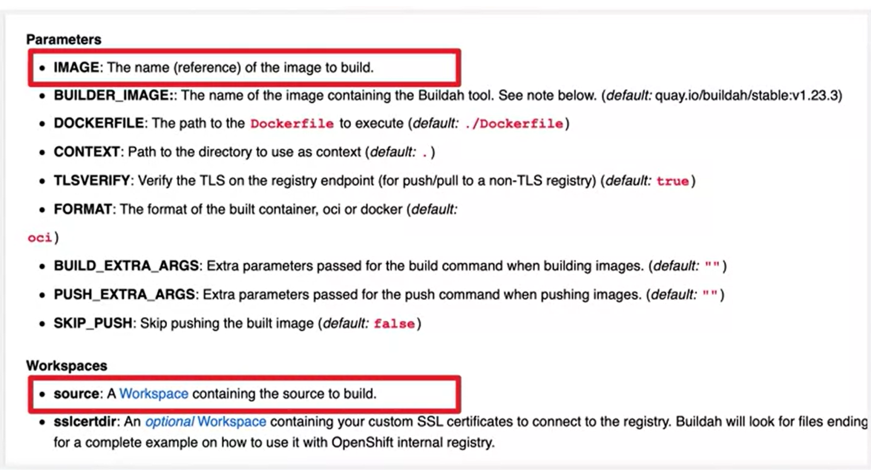

**How do you make use of the buildah task?**
* When you read the `buildah` documentation on **Tekton Hub**, you see that the only required parameter is the `IMAGE` parameter because it doesn't have a default.
* You also see that it requires a workspace named `source`.
* With those two pieces of information, you are ready to add the buildah task to your **Tekton pipeline**.

# Add buildah to the pipeline

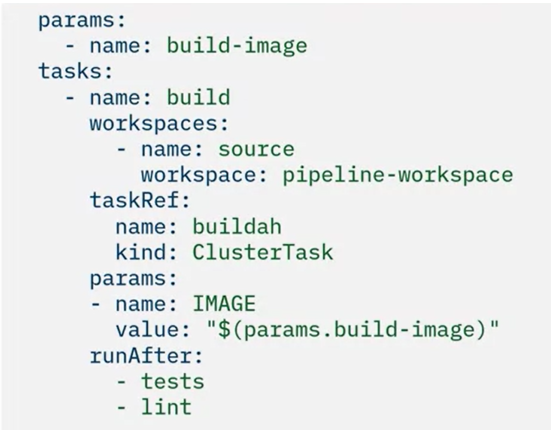

To add **buildah** to the pipeline
* You start by adding a new pipeline parameter called `build-image`.
* You will pass this parameter to the **buildah** task in a moment.

Now you can add a new task.
* There will be other tasks in the pipeline, but it doesn't matter where you add this task because it will always run after the tasks that you specify, not in the order in which you write them.
* You give this task the name `build`.
* Then, you add a definition for the `workspace`.
* The documentation states that **buildah** needs a `workspace` called `source` so you name the workspace `source` and use your **pipeline-workspace persistent volume claim** (or PVC).

Next, you reference the installed **buildah** task.
* If you are using the cluster task version, you must tell Tekton by using the `kind` keyword with a value of `ClusterTask`.
* This is not needed if you installed it locally in your **namespace**.
* Now it's time to create a parameter called `IMAGE` because that's the name of the parameter that **buildah** will look for.
* You give it a value that references the `params.build-image` from your pipeline parameter of the same name.

Finally, you specify that this pipeline task should run after both the `tests` and `lint` tasks have completed.
* If you remember, `tests` and `lint` are running in parallel, so if you want to make sure that you don't build the image until the code is tested and linted.
* Then you must specify both of those tasks by name as prerequisites for the build task using the `runAfter` keyword.

You have successfully added a build task to your pipeline using buildah.

# Summary

You learned that:
* You can use **Tekton Hub** to find build tasks for your CI/CD pipelines.
* You can use the **Tekton CLI** to find tasks instead of using the website.
* You can use `ClusterTasks` without having to install them locally in your namespace.
* To run a task after parallel tasks, you must specify all the parallel tasks in `runAfter`.